# Not needed

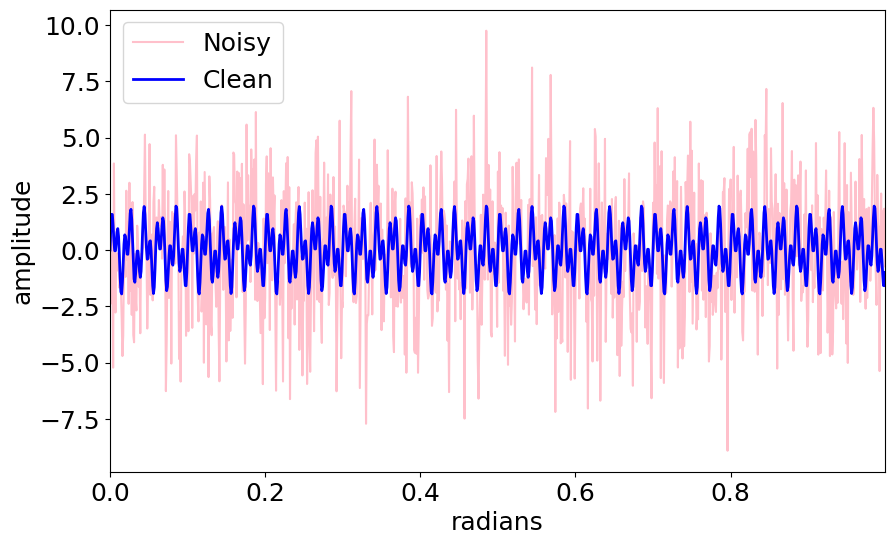

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 18})
#create sample signal with 2 frequencies
dt=0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)  #sum of 2 frequencies
f_clean = f
f=f+2.5*np.random.randn(len(t))               #Add some noise
plt.plot(t,f,color='pink',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='blue',linewidth=2, label='Clean')
plt.xlim(t[0],t[-1])
plt.xlabel('radians')
plt.ylabel('amplitude')
plt.legend()

c:\Users\brinley.patterson\AppData\Local\anaconda3\envs\Py37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


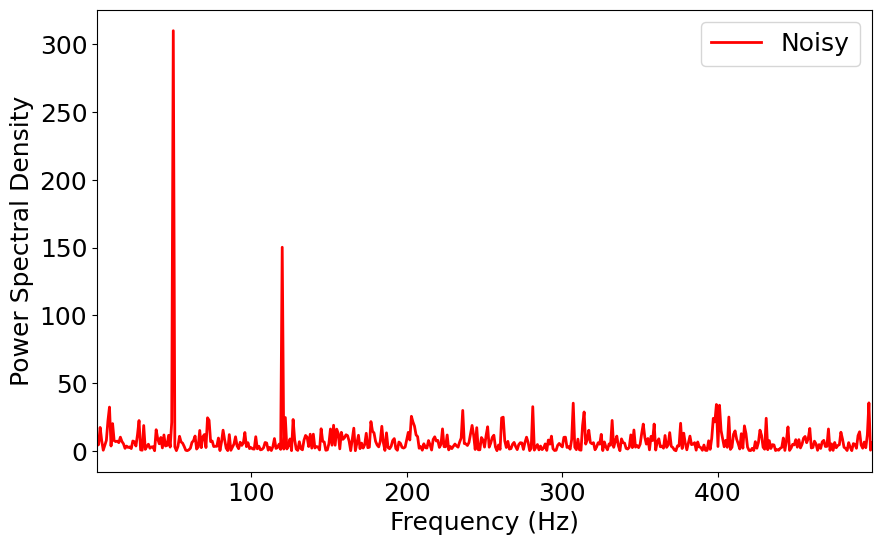

In [2]:
#compute the FFT algo
n = len(t)
fhat = np.fft.fft(f,n)                     #compute the FFT
PSD = fhat * np.conj(fhat)/n               #power spectrum 
freq = (1/(dt*n)) * np.arange(n)           #x-axis of frequencies 
L = np.arange(1,np.floor(n/2),dtype='int') #only plot 1st half
plt.plot(freq[L], PSD[L],color='red',linewidth=2, label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.legend()
plt.show()

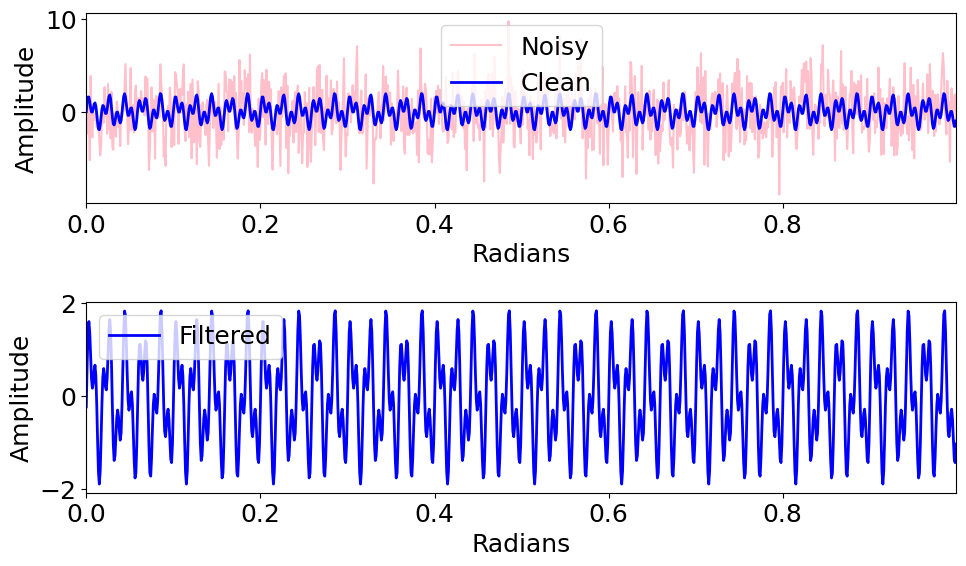

In [3]:
#Use PSD to filter out noise
indices = PSD > 100        # Find all freqs with large power
PSDclean = PSD * indices   # zero out all others via kronecker delta
fhat = indices*fhat        # zero out small fourier coffef. in Y
ffilt = np.fft.ifft(fhat)  # inverse fFFT for filtered time signal
#plot
fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t,f,color='pink', linewidth=1.5, label='Noisy')
plt.plot(t,f_clean,color='blue', linewidth=2, label='Clean')
plt.xlim(t[0],t[-1])
plt.xlabel('Radians')
plt.ylabel('Amplitude')
plt.legend()
plt.sca(axs[1])
plt.plot(t, ffilt,color='blue',linewidth=2, label='Filtered')
plt.xlim(t[0],t[-1])
plt.xlabel('Radians')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

# Stock predictor

In [4]:
#pip install yfinance

<AxesSubplot:title={'center':'TSLA stock price ($)'}, xlabel='Date'>

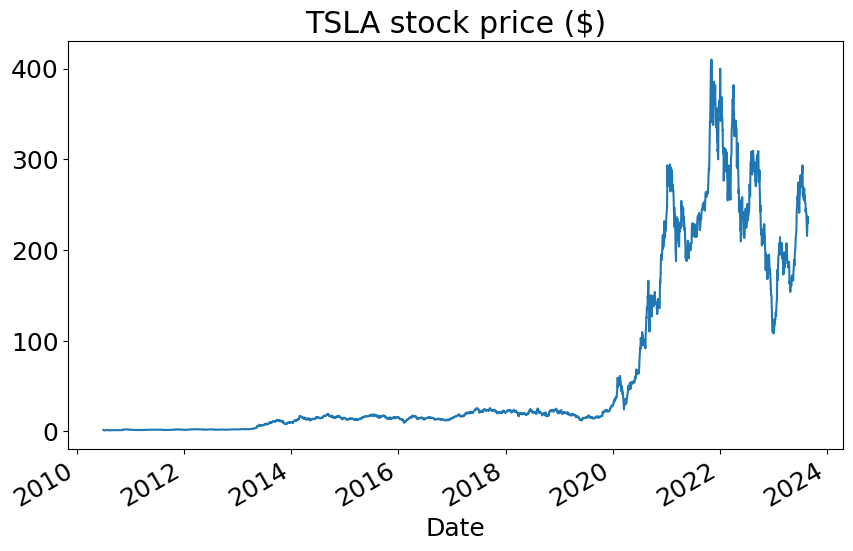

In [5]:
import yfinance as yf
import pandas as pd
ticker= yf.Ticker('TSLA')
tsla_df = ticker.history(period='max')
tsla_df['Close'].plot(title='TSLA stock price ($)')

In [6]:
start_d='2018-11-01'
end_d='2020-12-31'

Text(0.5, 1.0, 'Tesla Price')

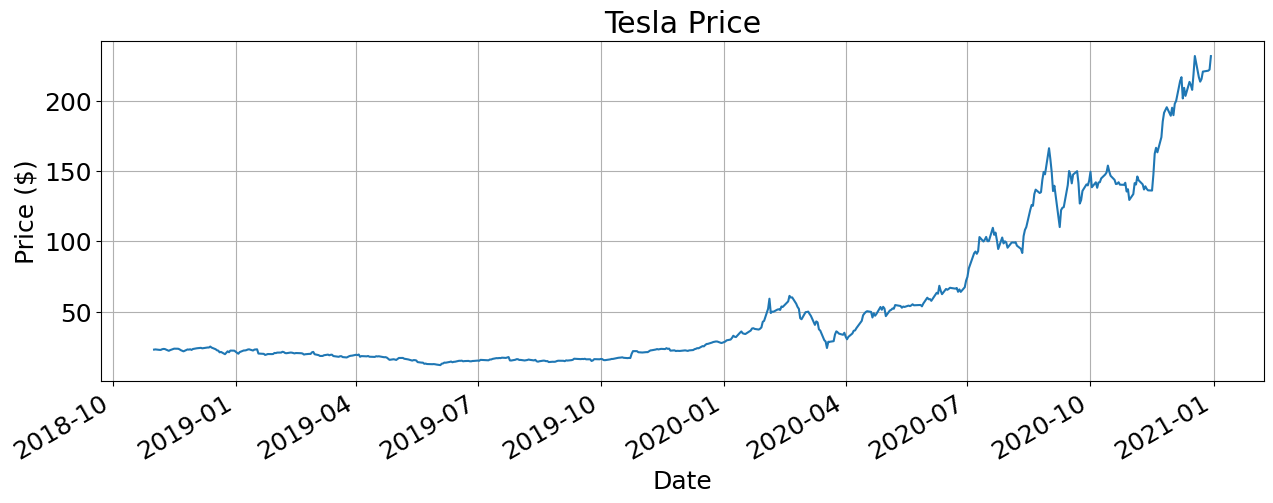

In [7]:
df = yf.download('TSLA',
                      start='2018-11-01',
                      end='2020-12-31',
                      progress=False)
plt.figure(figsize=(15,5))
df['Adj Close'].plot(grid=True)
plt.ylabel('Price ($)')
plt.title('Tesla Price')

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-01,22.550667,23.189333,22.315332,22.952000,22.952000,120001500
2018-11-02,22.916000,23.280001,22.727333,23.094000,23.094000,117120000
2018-11-05,22.700001,22.930668,22.009333,22.760000,22.760000,117465000
2018-11-06,22.604668,23.253332,22.406000,22.737333,22.737333,101443500
2018-11-07,22.889334,23.412001,22.719999,23.210667,23.210667,110617500
...,...,...,...,...,...,...
2020-12-23,210.733337,217.166672,207.523331,215.326660,215.326660,99519000
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800


In [9]:
df['delta'] = (df['Open'] - df['Close'])

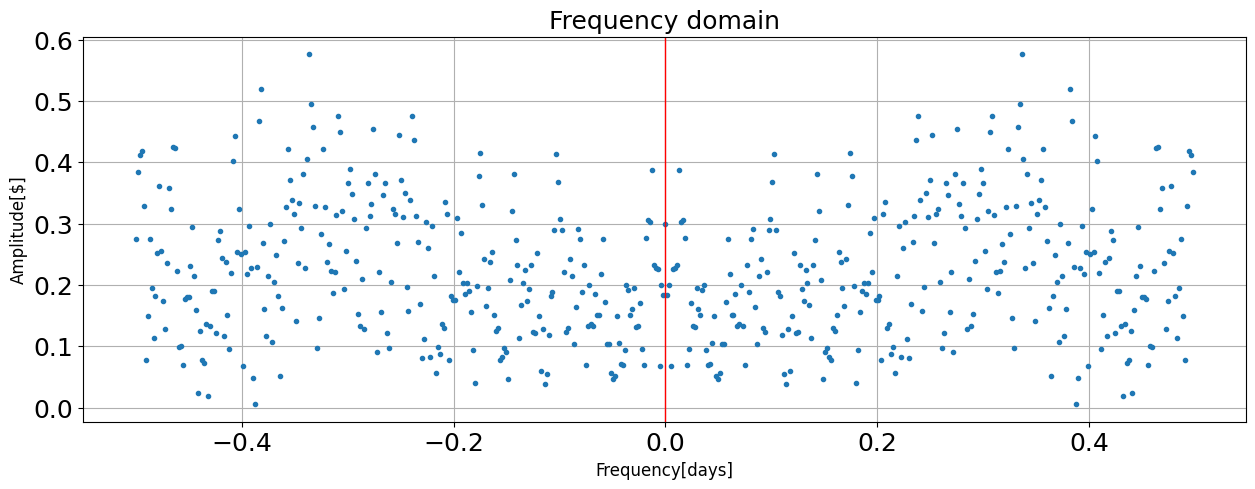

In [10]:
sp=np.fft.fft(df['delta'].values)
df['theta']=np.arctan(sp.imag/sp.real)
numValues = len(df)
numValuesHalf = numValues/2
df['amplitude']=np.sqrt(sp.real**2 + sp.imag**2)/numValuesHalf
df['freq'] = np.fft.fftfreq(sp.size, d=1)
df.head()
plt.figure(figsize=(15,5))
plt.plot(df['freq'],df['amplitude'].values,'.')
plt.axvline(x=0,ymin=0,ymax=1,linewidth=1,color='r')
plt.ylabel('Amplitude[$]', fontsize=12)
plt.xlabel('Frequency[days]', fontsize=12)
plt.title('Frequency domain', fontsize=18)
plt.grid()

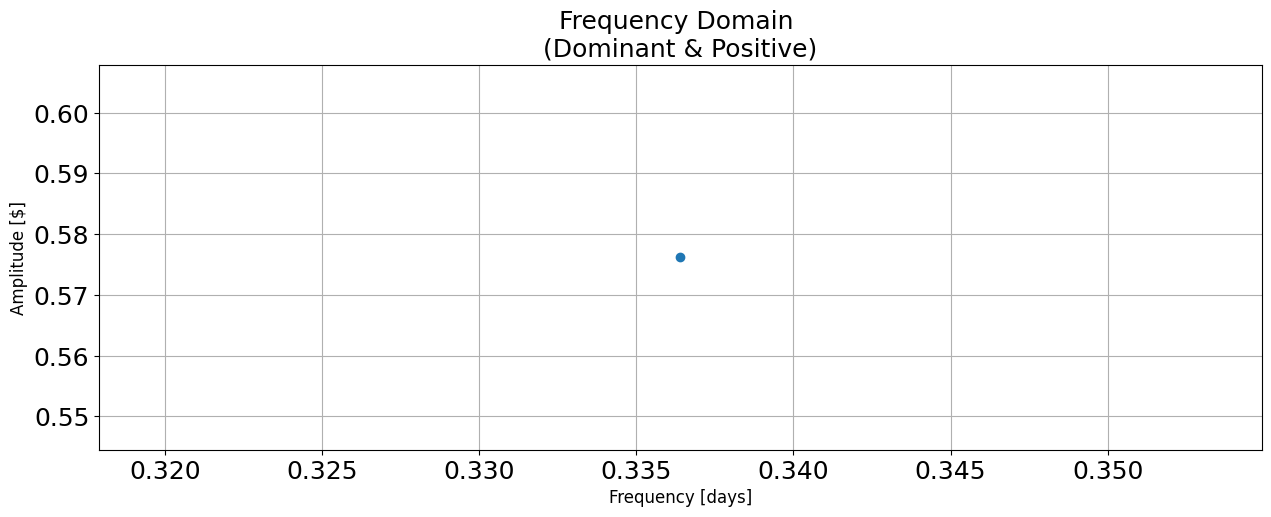

In [11]:
meanAmp = df['amplitude'].mean()
stdAmp = df['amplitude'].std()
dominantAmpCheck = df['amplitude'] > (3*stdAmp + meanAmp) 
positiveFreqCheck = df['freq'] > 0
dominantAmp = df[dominantAmpCheck & positiveFreqCheck]['amplitude']
dominantFreq = df[dominantAmpCheck & positiveFreqCheck]['freq']
dominantTheta = df[dominantAmpCheck & positiveFreqCheck]['theta']
plt.figure(figsize=(15,5))
plt.plot(dominantFreq, dominantAmp, 'o')
plt.ylabel('Amplitude [$]', fontsize=12)
plt.xlabel('Frequency [days]', fontsize=12)
plt.title('Frequency Domain \n(Dominant & Positive)', fontsize=18)
plt.grid()

In [12]:
# http://web.cecs.pdx.edu/~maier/cs584/Lectures/lect07b-11-MG.pdf

# Fast fourier transform

In [13]:
x = df['Adj Close']

t = x.index

In [14]:
from numpy.fft import fft, ifft

In [15]:
from datetime import datetime

# start date
start_date = datetime.strptime(start_d, "%Y-%m-%d")
end_date = datetime.strptime('2021-12-31', "%Y-%m-%d")

# difference between each date. D means one day
D = 'D'

date_list = pd.date_range(start_date, end_date, freq=D)

c:\Users\brinley.patterson\AppData\Local\anaconda3\envs\Py37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


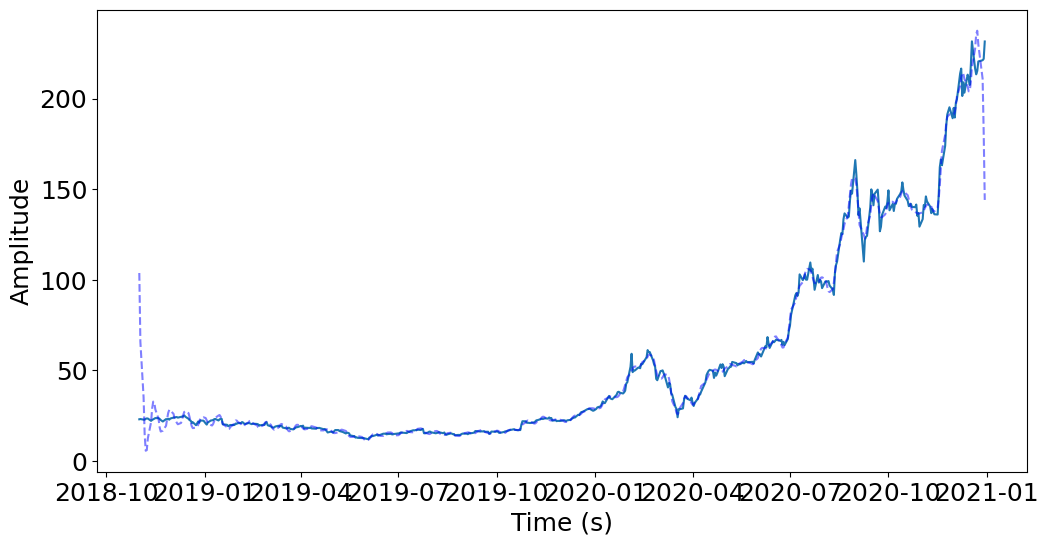

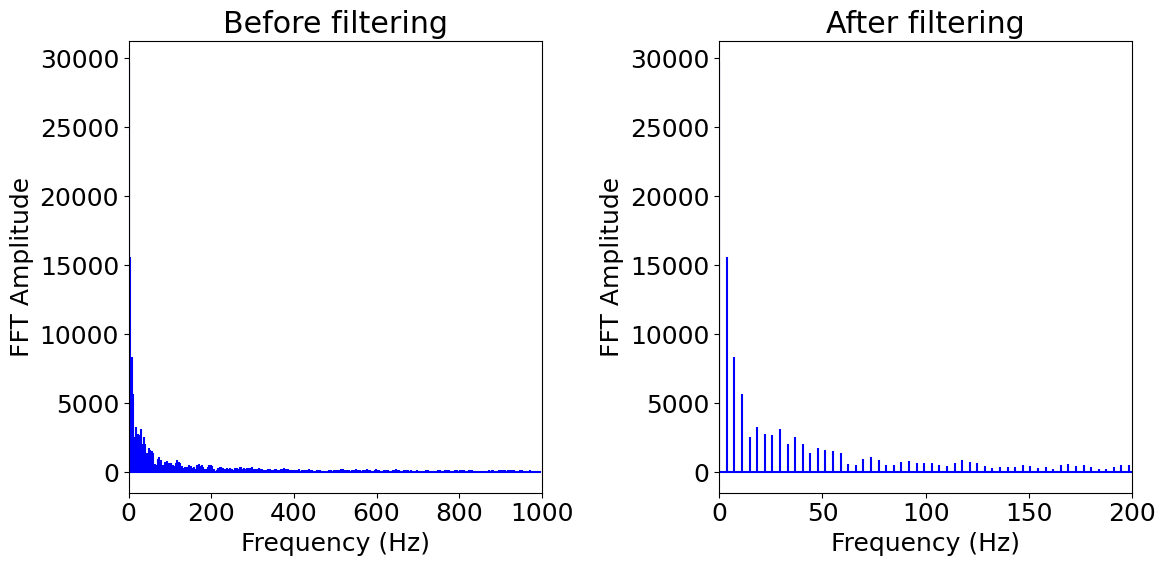

In [16]:
from scipy.fftpack import fftfreq

# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
bottom_cut_off = 0
top_cut_off = 200

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 

sig_fft_filtered[np.abs(freq) > top_cut_off] = 0

sig_fft_filtered[np.abs(freq) < bottom_cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the unfiltered signal
plt.figure(figsize = (12, 6))
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# plot the filtered signal
plt.plot(t, filtered, linestyle ='--', color ='b', alpha = 0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 1000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(bottom_cut_off, top_cut_off)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

In [1]:
from datetime import timedelta

In [11]:
# Fast fourier predictor

import yfinance as yf
import numpy as np
import pylab as pl
from numpy import fft
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
    
def fourierExtrapolation(x, n_predict,harmonics):
    n = x.size
    n_harm = harmonics                    # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

c:\Users\brinley.patterson\AppData\Local\anaconda3\envs\Py37\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
c:\Users\brinley.patterson\AppData\Local\anaconda3\envs\Py37\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Text(0.5, 1.0, 'BBY.L Price')

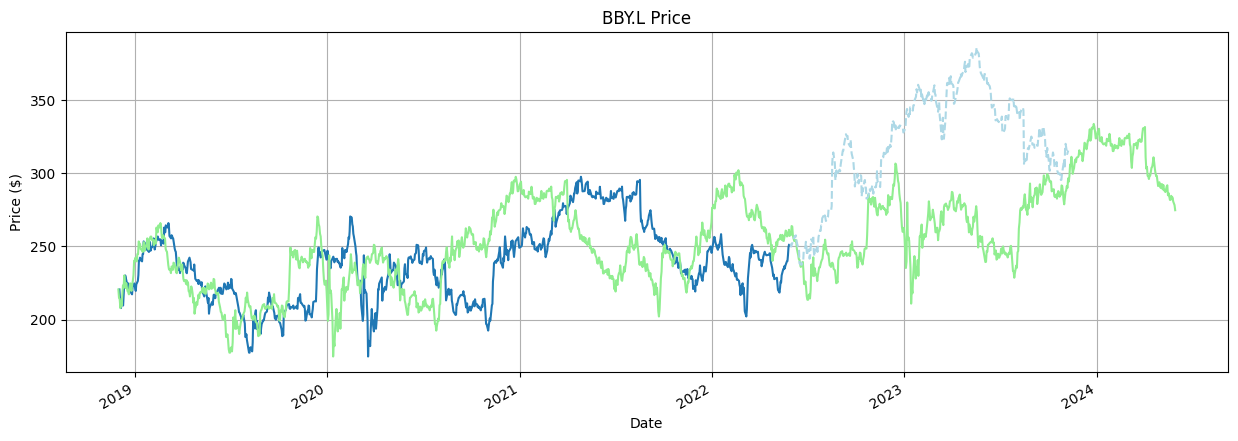

In [14]:
n_predict = 2*365
harmonic_waves = 10000

# Start date
day0 = 1
month0 = 12
year0 = 2018

# End date
day = 30
month = 5
year = 2022
stockname = 'BBY.L'
# BBV BBY.L
# Vinci DG.PA  

start_d = str(year0)+'-'+str(month0)+'-'+str(day0)


df = yf.download(stockname,
                      start=start_d,
                      end=str(year)+'-'+str(month)+'-'+str(day),
                      progress=False)
plt.figure(figsize=(15,5))
df['Adj Close'].plot(grid=True)

x = df['Adj Close']

t = pd.date_range(start=start_d,
                  end=pd.datetime.strptime(str(year)+'-'+str(month)+'-'+str(day), "%Y-%m-%d")+ timedelta(days=n_predict),
                  periods=len(x)+n_predict)


extrapolation = fourierExtrapolation(x, n_predict,harmonic_waves)

plt.plot(t,extrapolation, color = 'lightgreen')


df = yf.download(stockname,
                      start=str(year)+'-'+str(month)+'-'+str(day),
                      end=pd.datetime.strptime(str(year)+'-'+str(month)+'-'+str(day), "%Y-%m-%d")+ timedelta(days=n_predict),
                      progress=False)
df['Adj Close'].plot(grid=True,linestyle = '--', color = 'lightblue')


plt.ylabel('Price ($)')
plt.title(stockname + ' Price')